<a href="https://colab.research.google.com/github/ani-91/CS-F407-project/blob/main/geneticalgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib


Saving airline_data.csv to airline_data.csv
New Best Selected Flights (No NaN Values):
       YEAR MONTH QUARTER            AIRLINE_NAME       ORIGIN         DEST  \
993  2015.0   MAY      Q2               AEROLOGIC  Albuquerque      Houston   
7    2015.0   JAN      Q1              AIR ARABIA     Aberdeen  Minneapolis   
813  2015.0   APR      Q2  UNITED PARCEL SERVICES       Albany   Washington   
40   2015.0   JAN      Q1               FLY DUBAI  Adak Island    Anchorage   
702  2015.0   APR      Q2               LUFTHANSA       Albany      Orlando   
..      ...   ...     ...                     ...          ...          ...   
303  2015.0   FEB      Q1         MALINDO AIRWAYS        Akron     New York   
795  2015.0   APR      Q2            SAFI AIRWAYS       Albany        Tampa   
259  2015.0   FEB      Q1               AIR CHINA        Akron   Fort Myers   
435  2015.0   FEB      Q1      CHINA AIRLINES LTD        Akron   Washington   
551  2015.0   MAR      Q1            SAFI AI

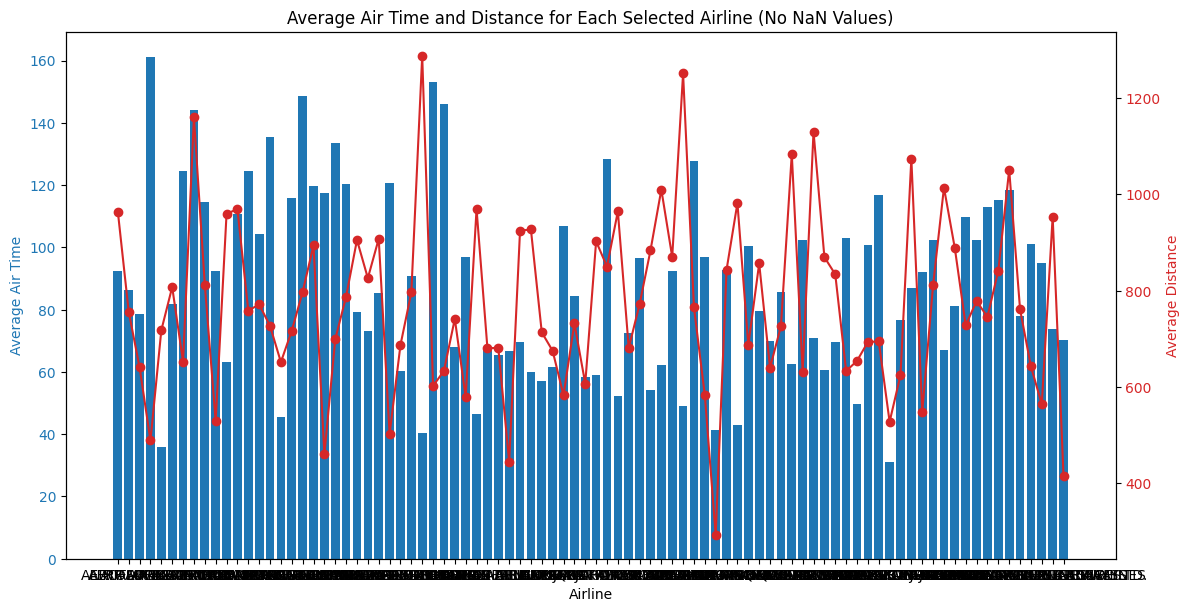

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
from google.colab import files
uploaded = files.upload()

# Read the uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Define the objective function for the genetic algorithm
def objective_function(solution):
    # Assuming solution is a list of indices corresponding to selected flights
    selected_flights = df.iloc[solution]

    # Check if the selected_flights DataFrame is empty
    if selected_flights.empty:
        return -np.inf,  # Return negative infinity for an empty selection

    # Calculate the fitness based on the criteria (e.g., maximize total passengers)
    fitness = selected_flights['PASSENGERS_ON_WAY'].sum() + selected_flights['PASSENGERS_RETURN'].sum()

    return fitness,

# Define the genetic algorithm parameters
population_size = 50
generations = 100
mutation_rate = 0.1

# Initialize the population
population = np.random.choice(len(df), size=(population_size, len(df)), replace=True)

# Run the genetic algorithm (additional run)
for generation in range(generations):
    # Evaluate the fitness of each individual in the population
    fitness_values = np.array([objective_function(ind)[0] for ind in population])

    # Select the top individuals based on fitness
    selected_indices = np.argsort(fitness_values)[-population_size:]
    selected_population = [population[i] for i in selected_indices]

    # Crossover (Two-Point Crossover)
    crossover_points = np.random.choice(len(df), size=(population_size // 2, 2))
    for i in range(0, population_size, 2):
        parent1, parent2 = selected_population[i], selected_population[i + 1]
        crossover_point1, crossover_point2 = crossover_points[i // 2]
        # Ensure valid indices for crossover
        population[i][crossover_point1:crossover_point2], population[i + 1][crossover_point1:crossover_point2] = \
            parent2[crossover_point1:crossover_point2], parent1[crossover_point1:crossover_point2]

    # Mutation (Shuffle Mutation)
    mutation_mask = np.random.rand(population_size, len(df)) < mutation_rate
    mutation_points = np.random.randint(0, len(df), size=(mutation_mask.sum(), 2))
    for i, point in zip(np.where(mutation_mask)[0], mutation_points):
        # Ensure valid indices for mutation
        population[i][point[0]], population[i][point[1]] = population[i][point[1]], population[i][point[0]]
# Extract the best solution
best_solution_index = np.argmax(fitness_values)
best_flights_indices = population[best_solution_index]
best_flights = df.iloc[best_flights_indices]

# Drop rows with NaN values
best_flights_cleaned = best_flights.dropna()

# Display the new best solution (selected flights without NaN values)
print("New Best Selected Flights (No NaN Values):")
print(best_flights_cleaned)

# Calculate the average AIR_TIME and DISTANCE for each selected airline
average_performance = best_flights_cleaned.groupby('AIRLINE_NAME')[['AIR_TIME', 'DISTANCE']].mean()

# Plot a bar plot for average AIR_TIME and DISTANCE per airline
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Airline')
ax1.set_ylabel('Average Air Time', color=color)
ax1.bar(average_performance.index, average_performance['AIR_TIME'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Distance', color=color)
ax2.plot(average_performance.index, average_performance['DISTANCE'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Air Time and Distance for Each Selected Airline (No NaN Values)')
plt.show()